# Sentiment Analysis using Bi-LSTM

## Load Dataset
Dataset obtained from <a href=https://data.mendeley.com/datasets/574v66hf2v/1>Indonesian (PRDECT-ID) Dataset</a>

In [48]:
import pandas as pd

In [49]:
df = pd.read_csv('./data/PRDECT-ID Dataset.csv')
df.head()

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy
1,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044,5,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy
2,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573,5,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy
3,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy


## Exploratory Data Analysis (EDA)

### Dataset Detail Information

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         5400 non-null   object 
 1   Product Name     5400 non-null   object 
 2   Location         5400 non-null   object 
 3   Price            5400 non-null   int64  
 4   Overall Rating   5400 non-null   float64
 5   Number Sold      5400 non-null   int64  
 6   Total Review     5400 non-null   int64  
 7   Customer Rating  5400 non-null   int64  
 8   Customer Review  5400 non-null   object 
 9   Sentiment        5400 non-null   object 
 10  Emotion          5400 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 464.2+ KB


In [51]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Category,5400,29,Computers and Laptops,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product Name,5400,1308,Minigold Black Series Logam Mulia Koin Emas Mi...,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5400,61,Jakarta Barat,1293,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,5400.0,NaN,NaN,NaN,238696.133519,801633.71926,100.0,20000.0,59900.0,150000.0,15399000.0
Overall Rating,5400.0,NaN,NaN,NaN,4.854389,0.108259,4.1,4.8,4.9,4.9,5.0
Number Sold,5400.0,NaN,NaN,NaN,15961.951852,74201.913338,9.0,1630.0,3794.5,9707.0,1000000.0
Total Review,5400.0,NaN,NaN,NaN,2168.645556,2915.666035,4.0,576.0,1192.0,2582.0,24500.0
Customer Rating,5400.0,NaN,NaN,NaN,3.087037,1.766258,1.0,1.0,3.0,5.0,5.0
Customer Review,5400,5305,Kualitas Produk Bagus.,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sentiment,5400,2,Negative,2821,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Distribution

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

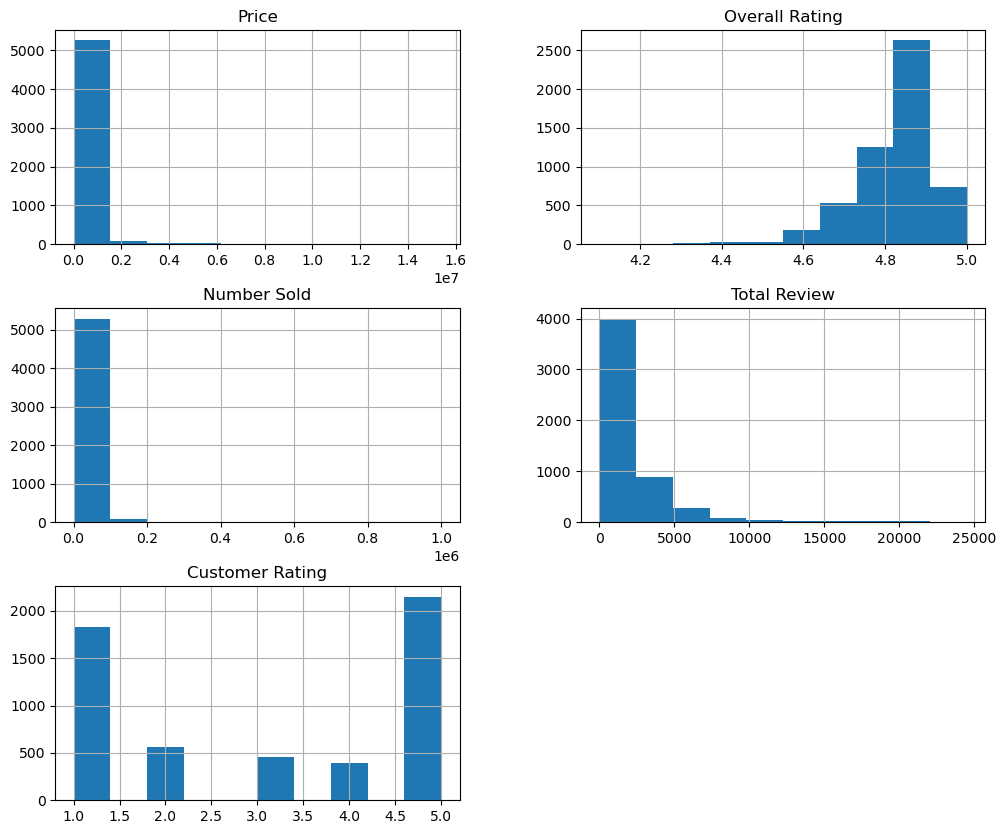

In [53]:
hist = df.hist(figsize=(12,10))

Text(0.5, 0.98, 'Categorical Data Distribution')

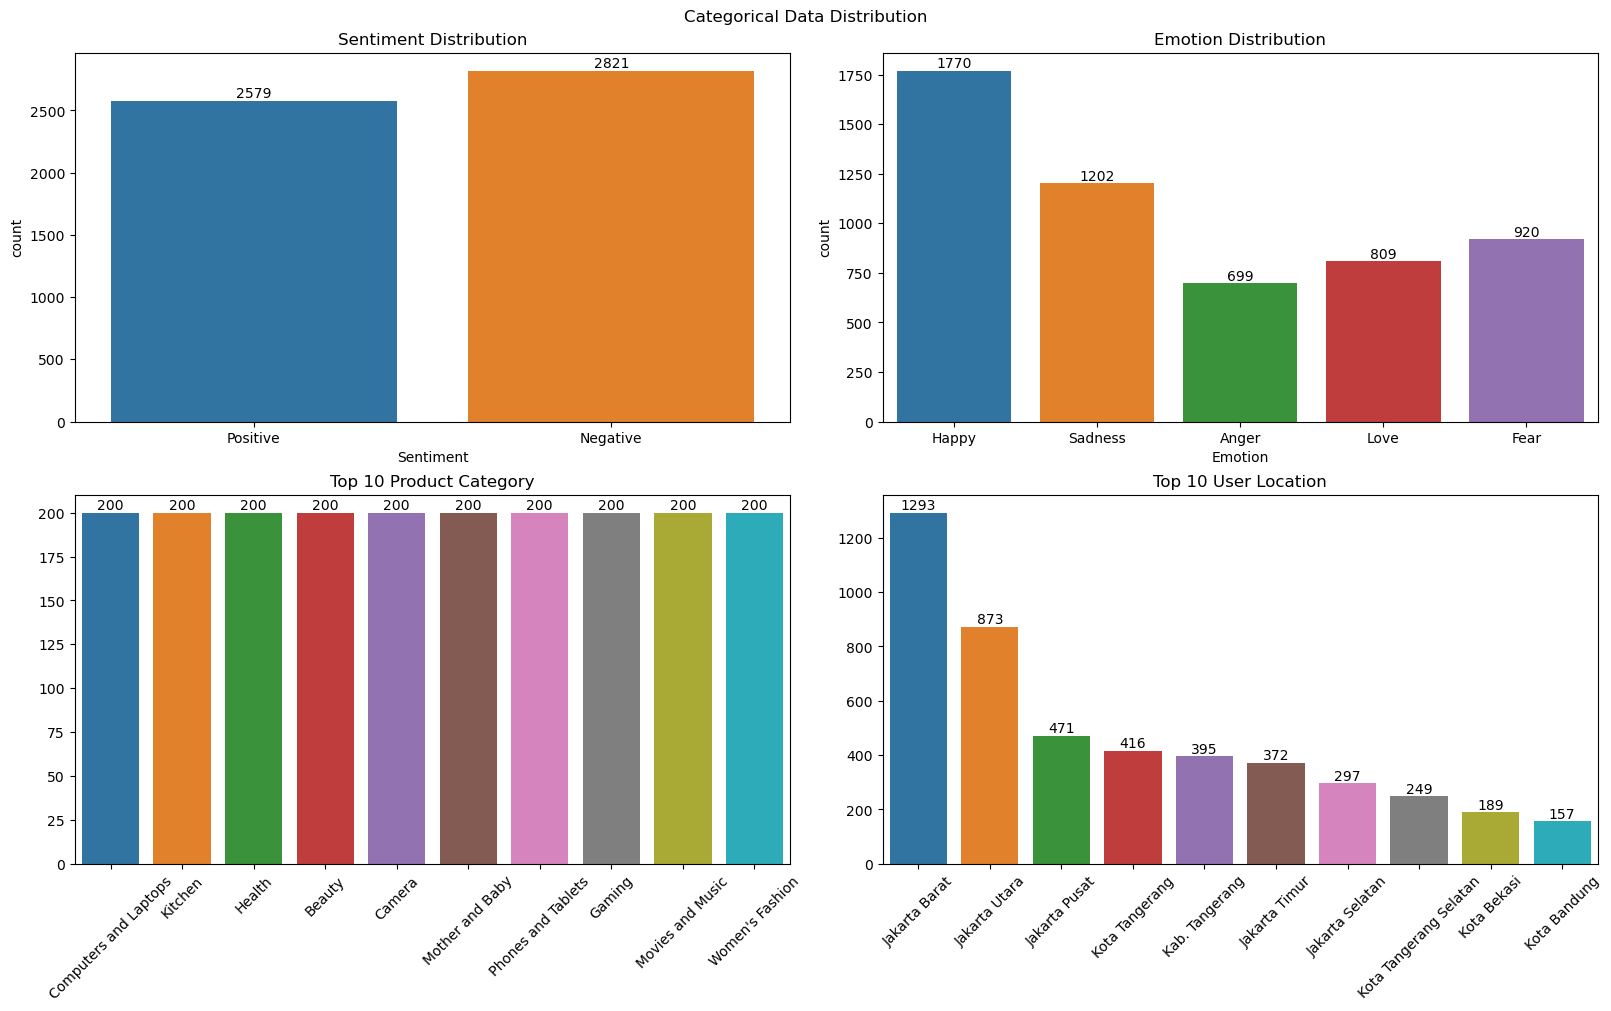

In [54]:
fig = plt.figure(figsize=(16, 10), layout="constrained")
spec = fig.add_gridspec(2, 2)

ax00 = fig.add_subplot(spec[0, 0])
tmp = df.select_dtypes(include=['O'])
ax00 = sns.countplot(data = tmp, 
                   x='Sentiment',
                   ax=ax00)
plt.title('Sentiment Distribution')
for i in ax00.containers:
    ax00.bar_label(i,)

ax01 = fig.add_subplot(spec[0, 1])
ax01 = sns.countplot(x='Emotion', data=tmp, ax=ax01)
plt.title('Emotion Distribution')
for i in ax01.containers:
    ax01.bar_label(i,)

ax10 = fig.add_subplot(spec[1, 0])
tmp = dict(df['Category'].value_counts()[:10])
ax10 = sns.barplot(x=list(tmp.keys()),y=list(tmp.values()))
plt.xticks(rotation=45)
plt.title('Top 10 Product Category')
for i in ax10.containers:
    ax10.bar_label(i,)

ax11 = fig.add_subplot(spec[1, 1])
tmp = dict(df['Location'].value_counts()[:10])
ax11 = sns.barplot(x=list(tmp.keys()),y=list(tmp.values()))
plt.xticks(rotation=45)
plt.title('Top 10 User Location')
for i in ax11.containers:
    ax11.bar_label(i,)
fig.suptitle('Categorical Data Distribution')

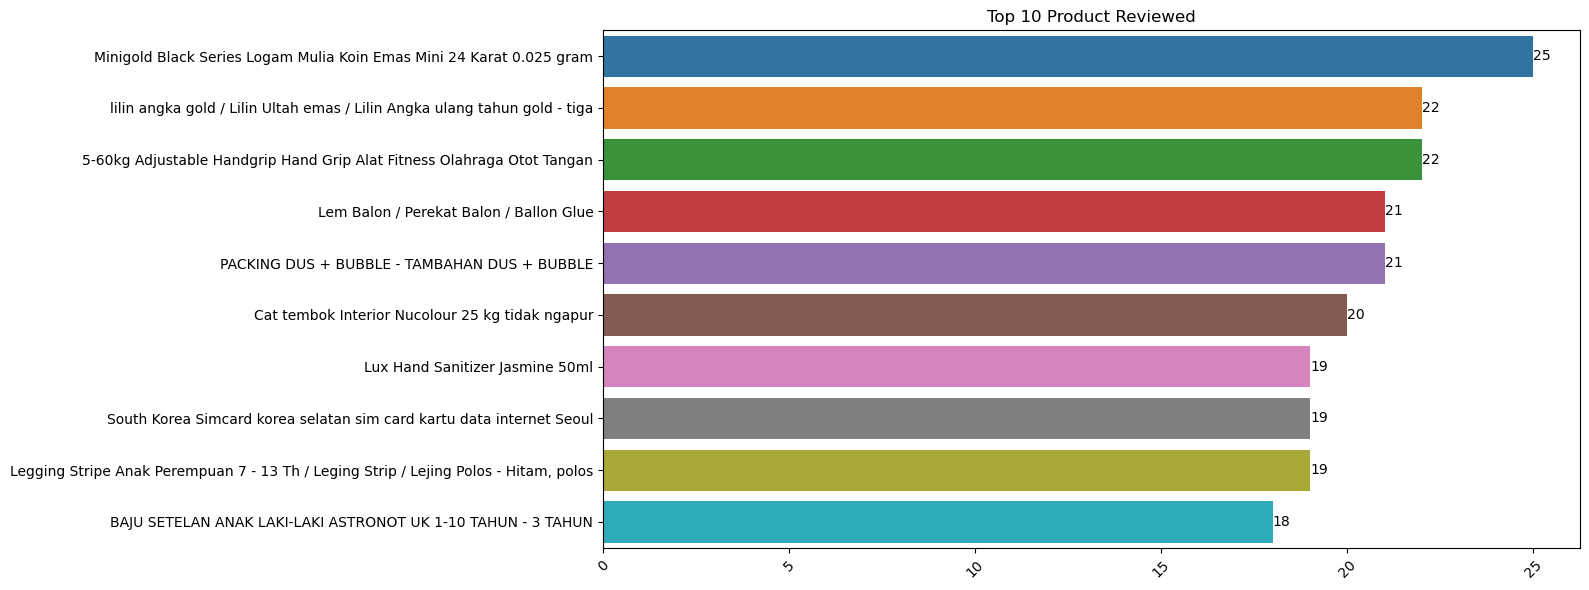

In [55]:
fig = plt.figure(figsize=(16, 6))
tmp = dict(df['Product Name'].value_counts()[:10])
ax = sns.barplot(y=list(tmp.keys()),x=list(tmp.values()), orient='h')
plt.xticks(rotation=45)
plt.title('Top 10 Product Reviewed')
for i in ax.containers:
    ax.bar_label(i,)
fig.tight_layout()

## Preprocessing Data

### Remove Unused Features

Because we only focused on Aspect-based Sentiment Analysis, we will use features to Customer Review and Sentiment.

In [56]:
df = df[['Customer Review','Sentiment']]
df

,Customer Review,Sentiment
0,Alhamdulillah berfungsi dengan baik. Packaging...,Positive
1,"barang bagus dan respon cepat, harga bersaing ...",Positive
2,"barang bagus, berfungsi dengan baik, seler ram...",Positive
3,bagus sesuai harapan penjual nya juga ramah. t...,Positive
4,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive
...,...,...
5395,"Harga bersaing, barang sesuai pesanan. Saya na...",Positive
5396,Beli ini krn Anak & Istri mau liburan di Jakar...,Positive
5397,"pengemasan barang baik, kondisi barang jg utuh...",Positive
5398,Mungil tapi bekerja dng baik. Dan murahh terja...,Positive


### Text Cleaning

In [57]:
import re

In [58]:
def clean_text(text):
    text = text.strip().lower()
    text = re.sub(r'[^A-Za-z0-9]+',' ', text)
    text = re.sub(r"\s{2,}", ' ', text)

    return text


In [59]:
df['clean_text'] = df['Customer Review'].apply(lambda x: clean_text(x))
df

,Customer Review,Sentiment,clean_text
0,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,alhamdulillah berfungsi dengan baik packaging ...
1,"barang bagus dan respon cepat, harga bersaing ...",Positive,barang bagus dan respon cepat harga bersaing d...
2,"barang bagus, berfungsi dengan baik, seler ram...",Positive,barang bagus berfungsi dengan baik seler ramah...
3,bagus sesuai harapan penjual nya juga ramah. t...,Positive,bagus sesuai harapan penjual nya juga ramah tr...
4,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,barang bagus pengemasan aman dapat berfungsi d...
...,...,...,...
5395,"Harga bersaing, barang sesuai pesanan. Saya na...",Positive,harga bersaing barang sesuai pesanan saya namb...
5396,Beli ini krn Anak & Istri mau liburan di Jakar...,Positive,beli ini krn anak istri mau liburan di jakarta...
5397,"pengemasan barang baik, kondisi barang jg utuh...",Positive,pengemasan barang baik kondisi barang jg utuh ...
5398,Mungil tapi bekerja dng baik. Dan murahh terja...,Positive,mungil tapi bekerja dng baik dan murahh terjan...


### Text Encoding

In [60]:
df['Sentiment'].replace({'Positive':1, 'Negative':0}, inplace=True)
df.Sentiment.value_counts()

0    2821
1    2579
Name: Sentiment, dtype: int64

### Oversampling Data

In [61]:
# min_sample = min(df['Sentiment'].value_counts())
# print('min sample', min_sample)
# dfg = df.groupby('Sentiment', as_index=False).apply(lambda x: x.sample(n=min_sample, random_state=1)).reset_index(drop=True)
# print('grouping sample =', len(dfg))

### Tokenize Word

In [62]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [63]:
tmp = set(df.clean_text.str.lower().str.split().sum())
print('number of word:',len(tmp))

number of word: 8913


In [64]:
vocab_words = 4000 # this define unique words can be taken 
tokenizer=Tokenizer(num_words=vocab_words,lower=True)
tokenizer.fit_on_texts(df.clean_text)

In [65]:
# find max length of sentences in the dataset
max_len = max([len(i.split(' ')) for i in df.clean_text])
print('max sentence length:',max_len)

max sentence length: 185


In [66]:
lst=[]
for i in df.clean_text:
  lst.append(len(i.split()))
len1=pd.DataFrame(lst)
len1.describe()

,0
count,5400.000000
mean,16.113889
std,15.722255
min,1.000000
25%,7.000000
50%,12.000000
75%,20.000000
max,184.000000


In [67]:
df_tokenize = tokenizer.texts_to_sequences(df.clean_text)
df_tokenize_pad = pad_sequences(df_tokenize, maxlen = 300, padding = 'post')

### Build Word Vector

In [68]:
def iter_data_from_df(df):
    res = []
    for line in df:
        res.append([word for word in line.split()])
    return res

In [69]:
import gensim

In [70]:
# load pre-defined word vec
# path = './model/emot_w2v.model'
# id_w2v = gensim.models.word2vec.Word2Vec.load(path)

In [71]:
from numpy import min_scalar_type


# w2v = gensim.models.word2vec.Word2Vec(iter_data('/clean/ricco48_clean_all2.txt'), vector_size=1000, epochs=20, min_count=3, window=2, sg=1)
w2v = gensim.models.word2vec.Word2Vec(vector_size=300, epochs=50, window=3, min_count=10, negative=8,sg=0)
w2v.build_vocab(iter_data_from_df(df.clean_text), progress_per=1000)
w2v.train(iter_data_from_df(df.clean_text), total_examples=w2v.corpus_count, epochs=w2v.epochs)

(2724638, 4350750)

In [72]:
print(w2v)
# # summarize vocabulary
# # words = w2v.wv
# # print(words.)
# # w2v.wv

Word2Vec<vocab=1080, vector_size=300, alpha=0.025>


In [73]:
w2v.wv.most_similar('senang')

[('keren', 0.5057237148284912),
 ('recommend', 0.4727385938167572),
 ('mantab', 0.46638959646224976),
 ('membantu', 0.45776063203811646),
 ('pokonya', 0.45563191175460815),
 ('puas', 0.4412257671356201),
 ('rekomended', 0.4226713180541992),
 ('adminnya', 0.4174698293209076),
 ('terimakasih', 0.41003304719924927),
 ('cakep', 0.40729770064353943)]

### Create Weight Matrix

In [74]:
import numpy as np

In [75]:
vector_size = w2v.vector_size
gensim_weight_matrix = np.zeros((vocab_words+1 ,vector_size))
gensim_weight_matrix.shape

(4001, 300)

In [76]:
def create_weight_matrix(model, dict_size):
  '''
  Accepts word embedding model
  and the second model, if provided
  Returns weight matrix of size m*n, where
  m - size of the dictionary
  n - size of the word embedding vector

  '''
  vector_size = model.vector_size
  w_matrix = np.zeros((dict_size, vector_size))
  skipped_words = []

  for word, index in tokenizer.word_index.items():
    if index < dict_size:
      if word in model.key_to_index: 
        w_matrix[index] = model[word]
      else:
          skipped_words.append(word)
 
  print(f'{len(skipped_words)} words were skipped. Some of them:')
  print(skipped_words[:50])
  
  return w_matrix, skipped_words

In [77]:
gensim_weight_matrix, skip_words = create_weight_matrix(w2v.wv, dict_size=tokenizer.num_words+1)

2920 words were skipped. Some of them:
['trimakasih', 'kenceng', 'komplen', 'sistem', 'malem', 'lelet', 'telp', 'nomor', 'janji', 'segera', 'tangerang', 'sebagai', 'menjawab', 'sisa', 'balas', 'kelihatan', 'rgb', 'lu', 'kencang', 'bubblewrap', 'senin', 'gunakan', 'min', 'balasan', 'expedisi', 'dilihat', 'perhatikan', 'beri', 'jakarta', 'ditulis', 'bsa', 'kakinya', 'stock', 'iklan', 'card', 'tunggu', 'bli', 'polos', 'brp', 'pudar', 'kotaknya', 'kapan', 'anak2', 'premium', 'soal', 'sisi', 'kira', 'real', 'sekelas', 'bentuknya']


In [78]:
gensim_weight_matrix.shape

(4001, 300)

### Splitting Data

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
from copy import deepcopy


# X = deepcopy(docvec_df)
# X = deepcopy(wordvec_df)
X = df_tokenize_pad
y = df.Sentiment
print('splitting data')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=1)

print(len(X_train))
print(len(X_val))
print(len(X_test))

splitting data
3456
864
1080


In [81]:
print(y_train.value_counts())
print(y_test.value_counts())

0    1806
1    1650
Name: Sentiment, dtype: int64
0    564
1    516
Name: Sentiment, dtype: int64


In [82]:
y_train_enc = pd.get_dummies(y_train).to_numpy()
y_val_enc = pd.get_dummies(y_val).to_numpy()
y_test_enc = pd.get_dummies(y_test).to_numpy()

## Model Training

### Define Neural Network Model

In [83]:
import torch

In [84]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional, Attention
import tensorflow
# from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.layers import Dropout

In [85]:
embed_dim = X_train.shape[1] #gensim_weight_matrix.shape[1] #200 
lstm_out = 2
num_words = tokenizer.num_words #len(tokenizer.word_index)

print(embed_dim)
print(num_words)
# print(len(tokenizer.word_index))

300
4000


In [86]:
model = Sequential()
model.add(
    Embedding(
        input_dim = num_words+1,
        output_dim = embed_dim,
        input_length= X_train.shape[1],
        weights = [gensim_weight_matrix],
        trainable = False
    )
)
# model.add(Dropout(.3))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(.5))
# model.add(Bidirectional(LSTM(64,return_sequences=True)))
# model.add(Dropout(.5))
# model.add(Bidirectional(LSTM(64,return_sequences=True)))
# model.add(Dropout(.5))
# model.add(Bidirectional(LSTM(32,return_sequences=False)))
# model.add(Dropout(.5))
# model.add(Dense(1, activation = 'relu'))
# model.add(Dropout(.3))
model.add(Dense(lstm_out, activation = 'softmax'))


# model = Sequential()
# model.add(Embedding(num_words, 128, input_length=X_train.shape[1]))
# model.add(Bidirectional(LSTM(128)))
# model.add(Dropout(0.3))
# model.add(Dense(class_num, activation='softmax'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = 'accuracy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 300)          1200300   
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              186880    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 1,387,438
Trainable params: 187,138
Non-trainable params: 1,200,300
_________________________________________________________________


In [87]:
# EarlyStopping and ModelCheckpoint
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)
mc = ModelCheckpoint('./model/model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [88]:
with tensorflow.device('/GPU:0'):
    history_embedding = model.fit(X_train, y_train_enc, 
                                    epochs = 40, batch_size = 32, 
                                    validation_data=(X_val, y_val_enc),
                                    verbose = 1, callbacks= [es, mc]  )

Epoch 1/40
108/108 [==============================] - ETA: 0s - loss: 0.2628 - accuracy: 0.9010
Epoch 1: val_accuracy improved from -inf to 0.92477, saving model to ./model\model.h5
108/108 [==============================] - 8s 50ms/step - loss: 0.2628 - accuracy: 0.9010 - val_loss: 0.1778 - val_accuracy: 0.9248
Epoch 2/40
107/108 [============================>.] - ETA: 0s - loss: 0.1507 - accuracy: 0.9492
Epoch 2: val_accuracy improved from 0.92477 to 0.93519, saving model to ./model\model.h5
108/108 [==============================] - 5s 43ms/step - loss: 0.1504 - accuracy: 0.9491 - val_loss: 0.1586 - val_accuracy: 0.9352
Epoch 3/40
107/108 [============================>.] - ETA: 0s - loss: 0.1215 - accuracy: 0.9571
Epoch 3: val_accuracy improved from 0.93519 to 0.93750, saving model to ./model\model.h5
108/108 [==============================] - 5s 44ms/step - loss: 0.1206 - accuracy: 0.9575 - val_loss: 0.1422 - val_accuracy: 0.9375
Epoch 4/40
107/108 [============================>.] 

In [89]:
import matplotlib.pyplot as plt

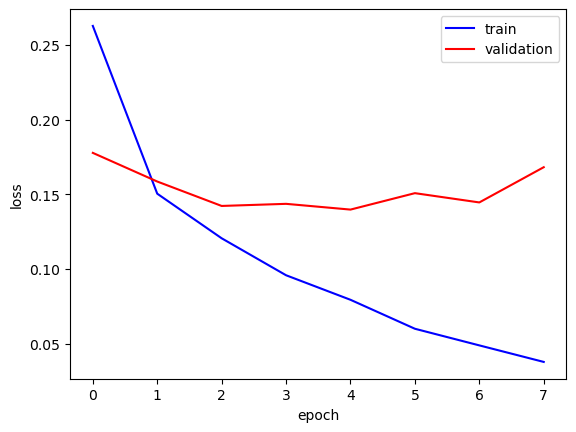

In [90]:
plt.plot(history_embedding.history['loss'],c='b',label='train')
plt.plot(history_embedding.history['val_loss'],c='r',label='validation')
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

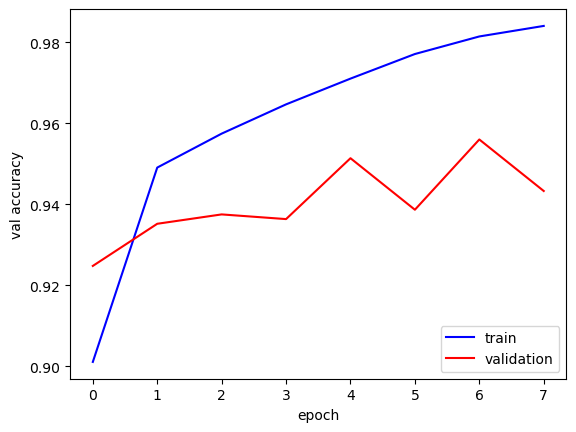

In [91]:
plt.plot(history_embedding.history['accuracy'],c='b',label='train')
plt.plot(history_embedding.history['val_accuracy'],c='r',label='validation')
plt.legend(loc='lower right')
plt.xlabel('epoch')
plt.ylabel('val accuracy')

plt.show()

### Optimum Model Evaluation

In [92]:
### Load Optimum Model
model = load_model('./model/model.h5')

In [93]:
from sklearn.metrics import classification_report 
y_pred = np.argmax(model.predict(X_test), axis  =  1)
y_true = np.argmax(y_test_enc, axis = 1)
print(classification_report(y_pred, y_true, target_names=['negative','positive']))


34/34 [==============================] - 1s 21ms/step
              precision    recall  f1-score   support

    negative       0.95      0.96      0.95       562
    positive       0.95      0.95      0.95       518

    accuracy                           0.95      1080
   macro avg       0.95      0.95      0.95      1080
weighted avg       0.95      0.95      0.95      1080



### Custom Test

In [99]:
text ='''
bahannya tipis, ringkih, dan keliatan murahan, tutupnya juga ga rapet jd suka bocor
'''
text = clean_text(text)
tmp = tokenizer.texts_to_sequences([text])
tmp = pad_sequences(tmp, maxlen = 300, padding = 'post')
res = list(model.predict(tmp)[0])
print(f'negative: {round(res[0], 3)} positive: {round(res[1], 2)}')

1/1 [==============================] - 0s 30ms/step
negative: 0.824999988079071 positive: 0.18000000715255737
